In [1]:
from sunpy.net import Fido
from sunpy.net import attrs as a

In [ ]:


event_type = "FL"
tstart = "2011/10/01"
tend = "2018/12/31"

result = Fido.search(a.Time(tstart, tend),
                     a.hek.EventType(event_type),
                     a.hek.FL.GOESCls > "C1.0",
                     a.hek.Event.Coord1 < 800,
                     a.hek.OBS.Observatory == "GOES")


# Here we only show two columns due there being over 100 columns returned normally.
# print(result.show("hpc_bbox", "refs"))

# It"s also possible to access the HEK results from the
# `~sunpy.net.fido_factory.UnifiedResponse` by name.
hek_results = result["hek"]

# keywords
#print(hek_results.colnames[::10])
# print(result["hek"]["fl_peakflux"])

filtered_results = hek_results["kb_archivid", "event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum", "event_coord1", "event_coord2", "event_coord3"]


# by_magnitude = sorted(filtered_results, key=lambda x: ord(x['fl_goescls'][0]) + float(x['fl_goescls'][1:]), reverse=True)

#for flare in by_magnitude:
#    print(flare['fl_goescls'], flare['event_starttime'])

filtered_results.write("flares_GOES.csv", format="csv", overwrite=True)


In [27]:
import pandas as pd

# event_type = "FL"
# tstart = "2011/10/01"
# tend = "2012/10/02"
# result = Fido.search(a.Time(tstart, tend),
#                      a.hek.EventType(event_type),
#                      a.hek.FL.GOESCls > "M1.0",
#                      a.hek.OBS.Observatory == "GOES")

# hek_results = result["hek"]

archive_id = list(hek_results['kb_archivid'])

def find_non_unique_items(lst):
    return list({x for x in lst if lst.count(x) > 1})

# archive_id_counts = pd.Series(archive_id).value_counts().where(lambda x : x > 1).dropna()
print(find_non_unique_items(archive_id))


# keywords
#print(hek_results.colnames[::10])
# print(result["hek"]["fl_peakflux"])

# filtered_results = hek_results["hpc_bbox", "event_starttime", "event_peaktime", "event_endtime", "fl_goescls", "ar_noaanum", "event_coord1", "event_coord2", "event_coord3"]

# filtered_results
# hek_results["hgs_coord", "event_coord1", "event_coord2", "event_coord3"]
# filtered_results.write("flares_GOES_20131028.csv", format="csv")

[]


In [8]:
import math
# filtered_results
hek_results["hgs_coord", "event_coord1", "event_coord2", "event_coord3"]
coord1 = list(hek_results["event_coord1"])
coord2 = list(hek_results["event_coord2"])
coord3 = list(hek_results["event_coord3"])
max(coord1), min(coord1), max(coord2), min(coord2)

(80, -86, 32, -28)

## Reload CSV file

In [15]:
import pandas as pd

df = pd.read_csv("flares_GOES.csv")
df['event_starttime'] = pd.to_datetime(df['event_starttime'], utc=True)
df['event_peaktime'] = pd.to_datetime(df['event_starttime'], utc=True)
df['event_endtime'] = pd.to_datetime(df['event_starttime'], utc=True)

print(df.dtypes)
df.head()

event_starttime    datetime64[ns, UTC]
event_peaktime     datetime64[ns, UTC]
event_endtime      datetime64[ns, UTC]
fl_goescls                      object
ar_noaanum                       int64
event_coord1                     int64
event_coord2                     int64
event_coord3                   float64
dtype: object


,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum,event_coord1,event_coord2,event_coord3
0,2011-10-01 03:50:00+00:00,2011-10-01 03:50:00+00:00,2011-10-01 03:50:00+00:00,C1.3,11305,0,0,NaN
1,2011-10-01 04:44:00+00:00,2011-10-01 04:44:00+00:00,2011-10-01 04:44:00+00:00,C4.1,11302,0,0,NaN
2,2011-10-01 08:56:00+00:00,2011-10-01 08:56:00+00:00,2011-10-01 08:56:00+00:00,M1.2,11305,6,10,NaN
3,2011-10-02 00:37:00+00:00,2011-10-02 00:37:00+00:00,2011-10-02 00:37:00+00:00,M3.9,11305,12,9,NaN
4,2011-10-02 03:10:00+00:00,2011-10-02 03:10:00+00:00,2011-10-02 03:10:00+00:00,C1.5,11302,0,0,NaN


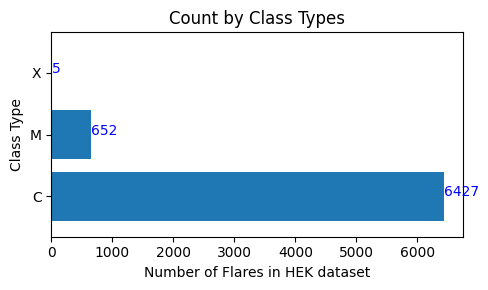

In [18]:
import matplotlib.pyplot as plt

df['clss'] = df['fl_goescls'].str[0]
df.value_counts('clss').plot(kind='barh', width=0.8, figsize=(5, 3))

plt.xlabel('Number of Flares in HEK dataset')
plt.ylabel('Class Type')
plt.title('Count by Class Types')

# Add individual numbers to the barplot
for i, v in enumerate(df.value_counts('clss')):
    plt.text(v + 3, i, str(v), color='blue')

plt.tight_layout()
plt.show()